# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [102]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [103]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [104]:
# read the data
df = pd.read_csv('foodhub_order.csv')

In [105]:
df['order_id'].nunique() == df['order_id'].count() # order id is unique, check if there is one row per order and it is

True

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

$\color{Blue}{\text{Rows and Column counts}}$

In [106]:
# Write your code here matches df.info
print(f"Rows: {df.shape[0]} Column: {df.shape[1]}") # the shape give you dimensions of the dataframe 

Rows: 1898 Column: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [107]:
# Use info() to print a concise summary of the DataFrame
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

$\color{Blue}{\text{There does not appear to be any missing values in the data}}$

In [108]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [109]:
df.head() #but some rating are missing and represented as Not given, we will replace not given as 0 so we can do calculations on it

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


$\color{Blue}{\text{New column with numeric rating called rating_num is created so as not to change original data}}$

In [110]:
df['rating_num'] = df['rating'].replace(['Not given','inf'],np.nan) #replace not given with nan
df['rating_num'] = df['rating_num'].fillna(0) # replace nan with 0
df['rating_num'] = df['rating_num'].astype(int)  #now we can conver rating to int
df['rating_num'].mean() # now we can do mean and get average rating for numeric calculation is working the mean is not accurate as missing values are 0

2.6596417281348788

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

$\color{Blue}{\text{Statistical Summary}}$

In [111]:
df.describe().T # transpose the data frame so rows have columns and columns have statistics

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
rating_num,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00


$\color{Blue}{\text{Food Preparation Time Summary}}$

In [112]:
x = df.describe().T
x.loc[['food_preparation_time'],['min','mean','max']] # we will use summary statistics and just filter food_preparation_time

,min,mean,max
food_preparation_time,20.0,27.37197,35.0


$\color{Blue}{\text{Creating new column called customer_time, this is prep time + delivery time}}$

In [113]:
df['customer_time'] = df['food_preparation_time'] + df['delivery_time'] #customer does not care about delivery time or prep time but total time

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
rating_num,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
customer_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

$\color{Blue}{\text{Orders that are not rated}}$

In [115]:
# Write the code here
print(df.loc[df['rating'] == 'Not given']['order_id'].count()) #filter dataframe by rating equal to Not given then count number of orders

736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [116]:
df['order_id'].count()

1898

In [117]:
df['order_id'].nunique()

1898

$\color{Blue}{\text{Some customers are repeat buyers}}$

In [118]:
df_repeat_customers = df[df['customer_id'].duplicated()]

In [119]:
df_one_time_customers = df.drop(df_repeat_customers.index)

In [164]:
df_one_time_customers[df_one_time_customers['customer_id'].duplicated()] #  above drop code worked as there are no duplicates in one time customers

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num,customer_time


In [166]:
df_repeat_customers.describe().T - df_one_time_customers.describe().T # lets subtract one df from another and get cheap insight

,count,mean,std,min,25%,50%,75%,max
order_id,-502.0,-45.664394,2.781782,5.00,-42.7500,-55.50,-42.50,1.00
customer_id,-502.0,-16408.590511,-11842.434513,5676.00,1096.7500,-9919.00,-54163.50,-5605.00
cost_of_the_order,-502.0,-0.182001,0.244543,0.19,-0.1875,-0.39,-0.05,2.09
food_preparation_time,-502.0,-0.005972,-0.137413,0.00,0.0000,0.00,0.00,0.00
delivery_time,-502.0,0.122588,-0.034794,0.00,0.0000,0.00,0.00,0.00
rating_num,-502.0,-0.109742,0.023724,0.00,0.0000,-1.00,0.00,0.00
customer_time,-502.0,0.116617,-0.223569,0.00,0.0000,1.00,0.00,0.00


$\color{Blue}{\text{Eyeballing Repeat vs One Time Customers there does not seem to be any difference in rating average but median of repeat customers is lower by 1 star}}$

In [120]:
df_one_time_customers.describe().T # these customers did not have repeat order

,count,mean,std,min,25%,50%,75%,max
order_id,1200.0,1.477512e+06,546.727101,1476547.00,1477039.75,1477521.00,1477982.25,1478443.00
customer_id,1200.0,1.772028e+05,117661.960754,1311.00,77543.00,133212.00,294304.00,405334.00
cost_of_the_order,1200.0,1.656578e+01,7.394444,4.47,12.13,14.46,22.31,33.32
food_preparation_time,1200.0,2.737417e+01,4.683743,20.00,23.00,27.00,31.00,35.00
delivery_time,1200.0,2.411667e+01,4.986359,15.00,20.00,25.00,28.00,33.00
rating_num,1200.0,2.700000e+00,2.186470,0.00,0.00,4.00,5.00,5.00
customer_time,1200.0,5.149083e+01,6.916510,35.00,47.00,51.00,56.00,68.00


In [121]:
df_repeat_customers.describe().T #statistics other than count do not make sense on order_id and customer_id

,count,mean,std,min,25%,50%,75%,max
order_id,698.0,1.477467e+06,549.508883,1476552.00,1.476997e+06,1477465.50,1477939.75,1478444.00
customer_id,698.0,1.607942e+05,105819.526241,6987.00,7.863975e+04,123293.00,240140.50,399729.00
cost_of_the_order,698.0,1.638378e+01,7.638987,4.66,1.194250e+01,14.07,22.26,35.41
food_preparation_time,698.0,2.736819e+01,4.546330,20.00,2.300000e+01,27.00,31.00,35.00
delivery_time,698.0,2.423926e+01,4.951565,15.00,2.000000e+01,25.00,28.00,33.00
rating_num,698.0,2.590258e+00,2.210193,0.00,0.000000e+00,3.00,5.00,5.00
customer_time,698.0,5.160745e+01,6.692942,35.00,4.700000e+01,52.00,56.00,68.00


In [168]:
df['cuisine_type'].nunique() #total types of cuisine and this should be same as type of restaurant for our analysis

14

$\color{Blue}{\text{Count of orders by Cuisine Type}}$

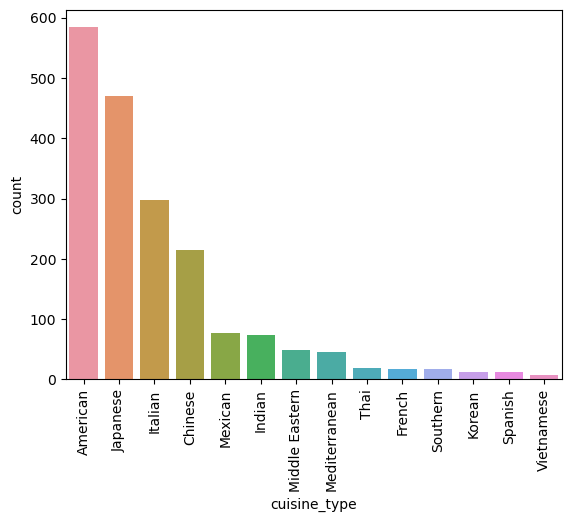

In [183]:
count_plot = sns.countplot(data=df,x='cuisine_type',order=df['cuisine_type'].value_counts().index) #count plot order by count of cuisines
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90) # rotate the labels 90deg so they do not overlap
plt.show()

$\color{Blue}{\text{Percentage of Orders by Cuisine Type, this does not give any better insight than count}}$

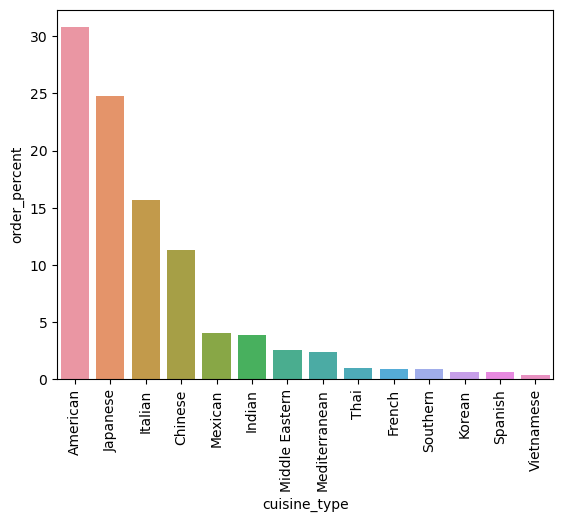

In [194]:
count_by_cuisine_type = df.groupby('cuisine_type')['order_id'].count()
total_orders = df['order_id'].count() # get total count
percent_cuisine = (count_by_cuisine_type / total_orders) * 100 # calculate percentage for each cuisine
sorted_percent_cuisine = percent_cuisine.sort_values(ascending=False).reset_index() # reset index to get col back
sorted_percent_cuisine = sorted_percent_cuisine.rename(columns={'order_id': 'order_percent'}) # sort so bars are in order
#sorted_percent_cuisine.head()
bar_plot = sns.barplot(data=sorted_percent_cuisine,x='cuisine_type',y='order_percent') #plot bar
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=90) #rotate the label 90 deg for increase readbility
plt.show()

$\color{Blue}{\text{Bar plot of cuisine_type and cost_of_the_order as a percentage of total revenue}}$

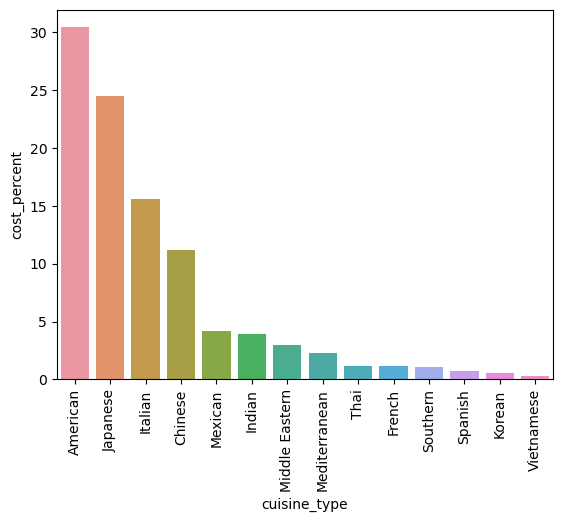

In [195]:
rev_by_cuisine_type = df.groupby('cuisine_type')['cost_of_the_order'].sum()
total_rev = df['cost_of_the_order'].sum()
percent_rev = (rev_by_cuisine_type / total_rev) * 100

sorted_percent_rev = percent_rev.sort_values(ascending=False).reset_index()
sorted_percent_rev = sorted_percent_rev.rename(columns={'cost_of_the_order': 'cost_percent'})
bar_plot = sns.barplot(data=sorted_percent_rev,x='cuisine_type',y='cost_percent')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=90)
plt.show()

In [196]:
print(f"percent rev {sorted_percent_rev['cost_percent'].sum()},percent order {sorted_percent_cuisine['order_percent'].sum()}")
# both sum to 100% so calculatons seems to be corect

percent rev 100.0,percent order 99.99999999999999


$\color{Blue}{\text{From Above 2 Graphs Percentage Order Count and Percentage Cost are identical so order count and cost have same statistical properties!}}$

$\color{Blue}{\text{Data seems to be generated? or this is statistical fluke}}$

$\color{Blue}{\text{Below Cost is skewed to the right and seems to have long right tail}}$

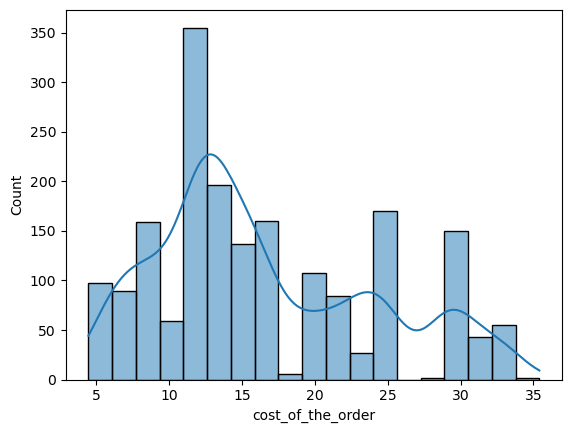

In [182]:
hist_plot = sns.histplot(data=df,x='cost_of_the_order',kde='True')
plt.show()

$\color{Blue}{\text{Median order is under 15 Dollars}}$

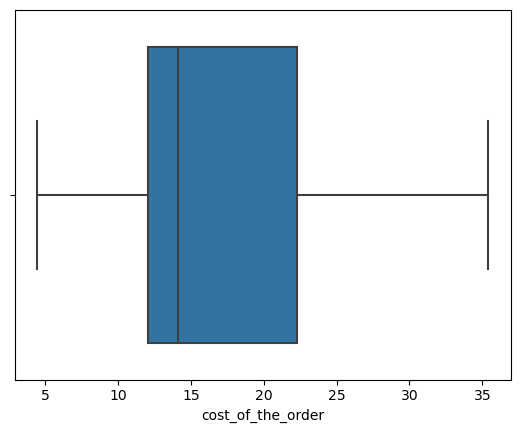

In [198]:
box_plot = sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

$\color{Blue}{\text{75% of customers are getting delivery under the hour }}$

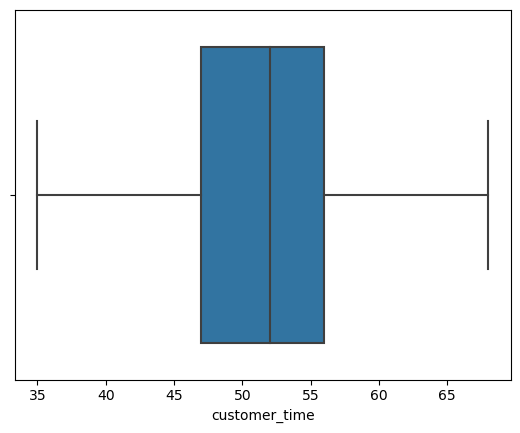

In [199]:
box_plot = sns.boxplot(data=df,x='customer_time')
plt.show()

## Below
* $\color{Blue}{\text{Customer Time is almost normal, }}$
* $\color{Blue}{\text{Cost of the order is right skewed, }}$
* $\color{Blue}{\text{Rating is bimodal around 0 (Not Rated) and 4 }}$
* $\color{Blue}{\text{Cost of the Order vs Customer Time is uniform}}$

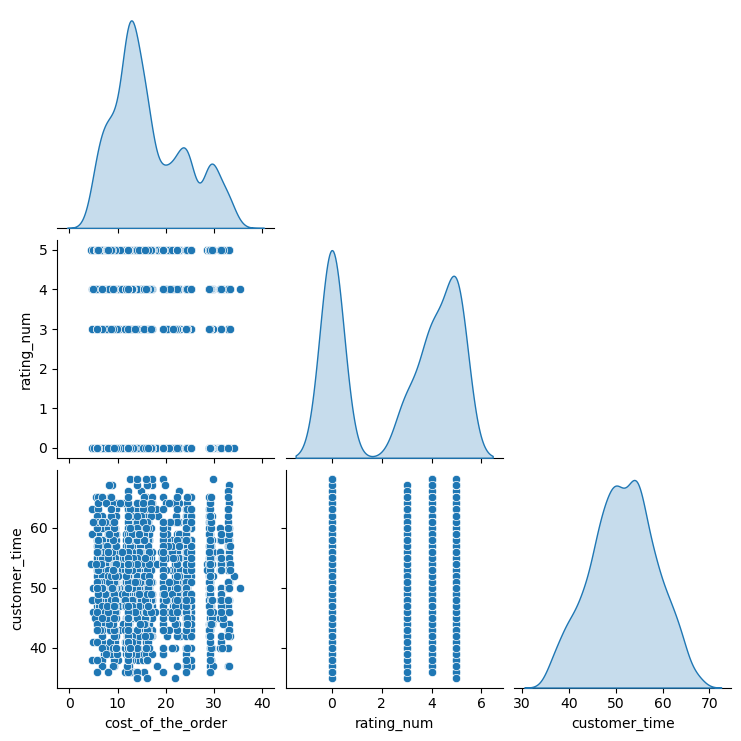

In [128]:
# Write the code here
# droping prep time and delivery time since we are considering sum of them as one metric
# dropping order id and customer id has they should not have any interesting statistical properties
df2 = df.drop(['order_id','customer_id','food_preparation_time','delivery_time'],axis=1) 
sns.pairplot(df2,corner=True,diag_kind='kde');

$\color{Blue}{\text{Weekend has almost twice as much orders as week days combined}}$

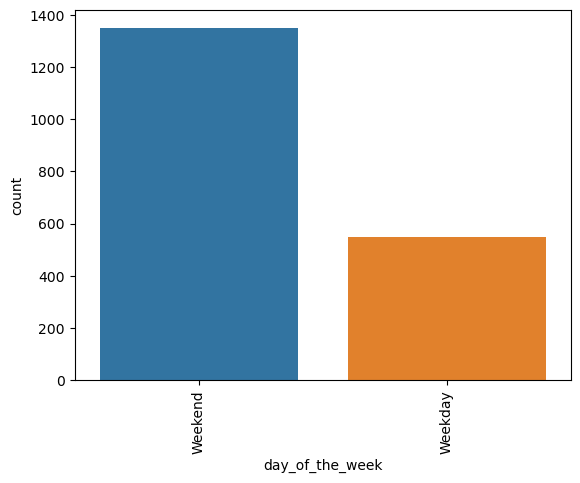

In [201]:
count_plot = sns.countplot(data=df,x='day_of_the_week',order=df2['day_of_the_week'].value_counts().index)
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)
plt.show()

$\color{Blue}{\text{Weekend has almost twice as much revenue as week days combined}}$


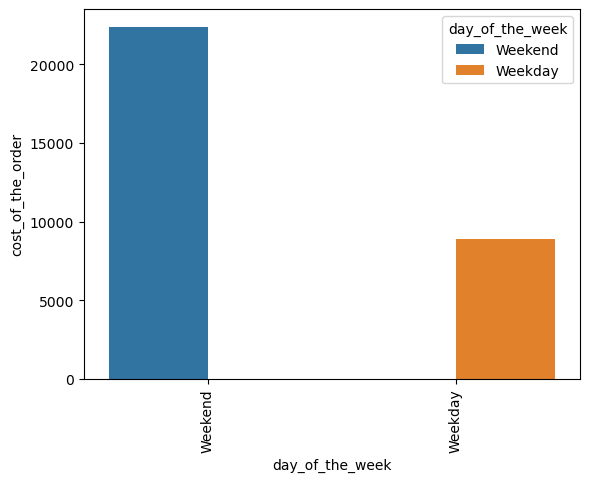

In [202]:
df_cost = df.groupby(['day_of_the_week'])['cost_of_the_order'].sum().reset_index()
df_cost = df_cost.sort_values(by='cost_of_the_order',ascending=False) #need to sort so the weekend comes first like the above chart
bar_plot = sns.barplot(data=df_cost,x='day_of_the_week',y='cost_of_the_order',hue='day_of_the_week')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=90)
plt.show()

$\color{Blue}{\text{American and Japanese are top two categories by count}}$


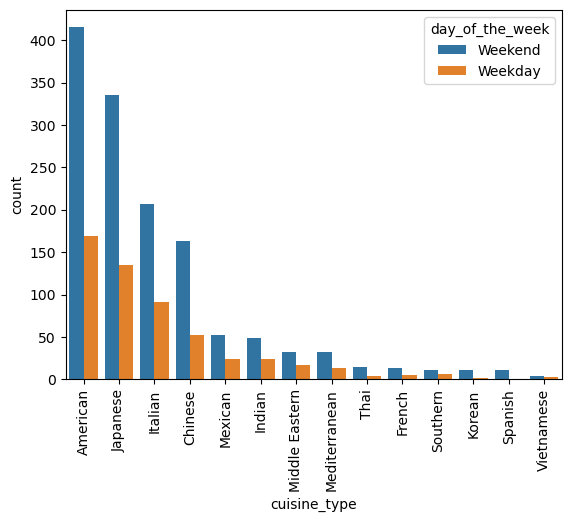

In [203]:
count_plot = sns.countplot(data=df,x='cuisine_type',order=df2['cuisine_type'].value_counts().index,hue='day_of_the_week')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)
plt.show()

$\color{Blue}{\text{American and Japanese are top two categories by revenue}}$

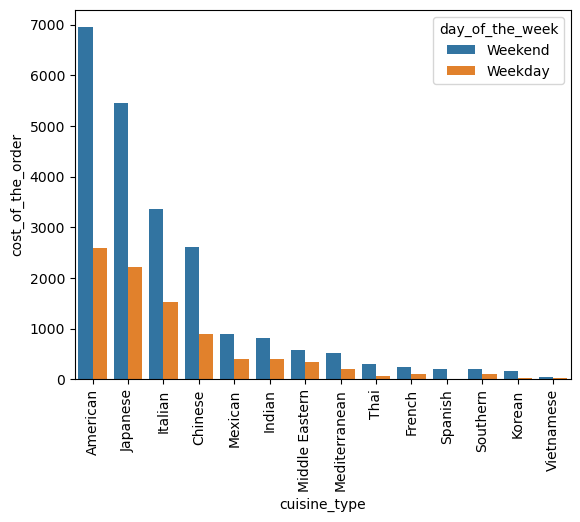

In [204]:
group_df = df.groupby(['cuisine_type','day_of_the_week'])['cost_of_the_order'].sum().reset_index()
group_df_sorted = group_df.sort_values(by='cost_of_the_order', ascending=False)

count_plot = sns.barplot(data=group_df_sorted,x='cuisine_type',y='cost_of_the_order',hue='day_of_the_week')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)
plt.show()

$\color{Blue}{\text{Higher the rating higher the total customer delivery time and higher the cost}}$

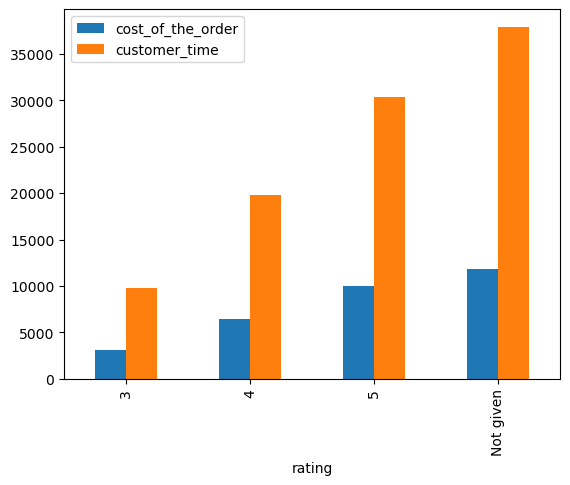

In [205]:
group_df = df.groupby(['rating'])[['cost_of_the_order','customer_time']].sum()
group_df.plot.bar()
plt.show()

$\color{Blue}{\text{Highest revenue from above is not in line with average high rating}}$

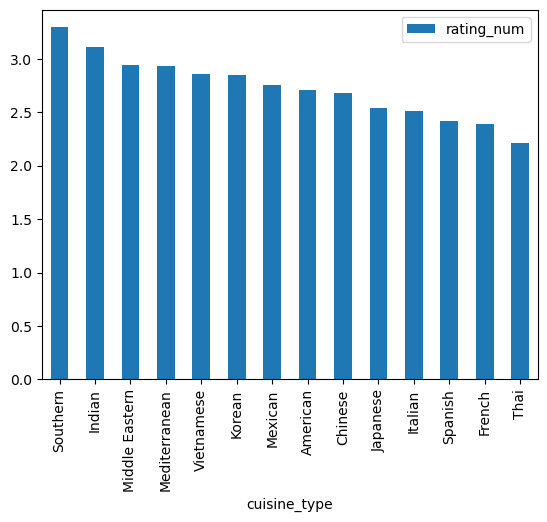

In [206]:
group_df = df.groupby(['cuisine_type'])[['rating_num']].mean()
group_df_sorted = group_df.sort_values(by='rating_num', ascending=False)
group_df_sorted.plot.bar()
plt.show()

$\color{Blue}{\text{Mean time to delivery is identical irrespective of rating}}$

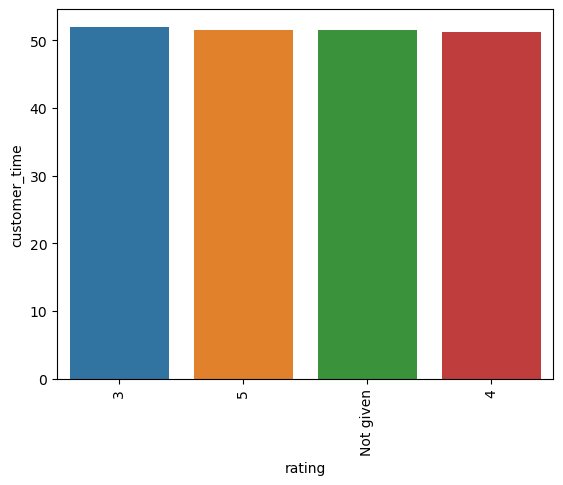

In [208]:
group_df = df.groupby(['rating'])['customer_time'].mean().reset_index()
group_df_sorted = group_df.sort_values(by='customer_time', ascending=False)

count_plot = sns.barplot(data=group_df_sorted,x='rating',y='customer_time')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)
plt.show()

## <font color="Blue">Distribution Summary</font>
* Delivery Time 
    * Bi Modal
* Food preperation time
    * Uniform
* Cost of the Order
    * Right Skewed
* There is no pattern between any of the above variables   
* Surprising lower rating does not mean low revenue
* Also, high rating does not mean faster delivery, though there is very small negative correlation between customer time to delivery and rating

In [215]:
corr = df2.corr() # get correlation of few columns

In [216]:
corr # next we will display only lower triangle

,cost_of_the_order,rating_num,customer_time
cost_of_the_order,1.000000,0.049531,0.006358
rating_num,0.049531,1.000000,-0.002046
customer_time,0.006358,-0.002046,1.000000


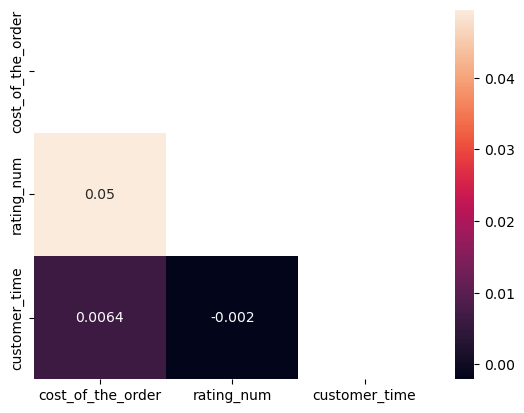

In [217]:
 # get correlation matrix, df2 does not have metrics that may not be useful such as customerid, orderid and not customer time to delivery
matrix = np.triu(np.ones_like(corr,dtype=bool)) # get upper triangle mask
sns.heatmap(corr,annot=True, mask=matrix); # remove the upper triangle values and put ; at the end for cleaner plot

## <font color="Blue">Correlation is Weak </font>
* There is not much correlation that stands out
* Delivery Time and Cost of the order have slight positive correlation, customers rate higher if they paid more!
* Delivery Time and rating have slight negative correlation
    

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [219]:
# group by restaurant name, the count orders in each group and then get largest 5, name the new count col as order_count
df_top_5_restaurant = df.groupby(['restaurant_name'])['order_id'].count().nlargest(5).reset_index(name='order_count')

## <font color="Blue">Top 5 restaurants by order count </font>

In [220]:
df_top_5_restaurant

,restaurant_name,order_count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [221]:
# Write the code here
df_top_1_cuisine =  df.loc[df['day_of_the_week']== 'Weekend'].groupby(['cuisine_type'])['order_id'].count().nlargest(1).reset_index(name='order_count')

## <font color="Blue">Most popular cuisince on weekends </font>

In [222]:
df_top_1_cuisine

,cuisine_type,order_count
0,American,415


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [223]:
# Write the code here
order_cost_more_than_20_percentage = df[df['cost_of_the_order'] > 20]['order_id'].nunique()/df['order_id'].nunique()

## <font color="Blue">Percentage of Orders that are greater than 20$ </font>

In [224]:
round(order_cost_more_than_20_percentage,2)

0.29

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [225]:
mean_order_delivery_time_mm = df['delivery_time'].mean()

## <font color="Blue">Mean order delivery time in minutes this is misleading as customer_time about twice as big</font>


In [227]:
round(mean_order_delivery_time_mm,2) # round of numbers to see better. 

24.16

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

## <font color="Blue">Top 3 most frequent customers</font>

In [228]:
# Write the code here
df.groupby(['customer_id'])['order_id'].count().nlargest(3).reset_index(name='order_count') #lets me give new name to count

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [229]:
calc_agg = {
    'cost_of_the_order':['mean','sum'],
    'customer_time':['mean','sum']
}
group_df = df.groupby(['cuisine_type']).agg(calc_agg).reset_index()
group_df.columns = ['_'.join(col).strip() for col in group_df.columns]
group_df = group_df.rename(columns={'cuisine_type_':'cuisine_type'})

In [230]:
group_df.sort_values(['cost_of_the_order_mean','cost_of_the_order_sum'], ascending=False)

,cuisine_type,cost_of_the_order_mean,cost_of_the_order_sum,customer_time_mean,customer_time_sum
2,French,19.793889,356.29,52.222222,940
10,Southern,19.300588,328.11,51.411765,874
12,Thai,19.207895,364.95,50.473684,959
11,Spanish,18.994167,227.93,50.333333,604
9,Middle Eastern,18.820612,922.21,50.755102,2487
8,Mexican,16.933117,1303.85,51.116883,3936
3,Indian,16.919726,1235.14,51.191781,3737
4,Italian,16.418691,4892.77,52.050336,15511
0,American,16.319829,9530.78,51.633562,30154
1,Chinese,16.305209,3505.62,51.367442,11044


## <font color="Blue">Total revenue of American cuisine is the highest</font>

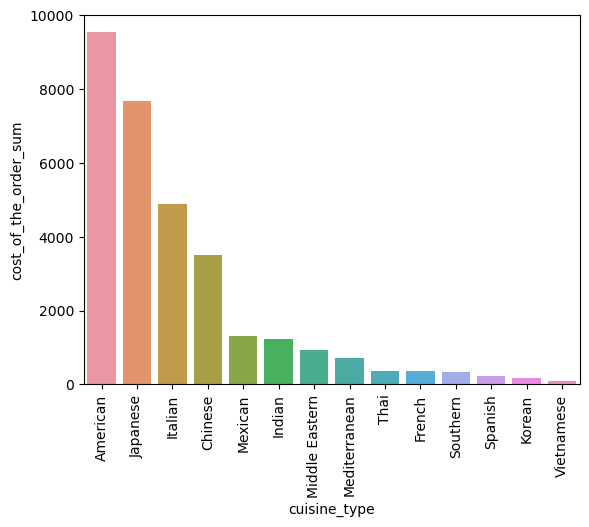

In [231]:
df_cost = group_df.sort_values(by='cost_of_the_order_sum',ascending=False) #need to sort so the weekend comes first like the above chart
bar_plot = sns.barplot(data=df_cost,x='cuisine_type',y='cost_of_the_order_sum');
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=90)
plt.show()

## <font color="Blue">Average Cost of order is highest for the French Cuisine but their total revenue very small</font>

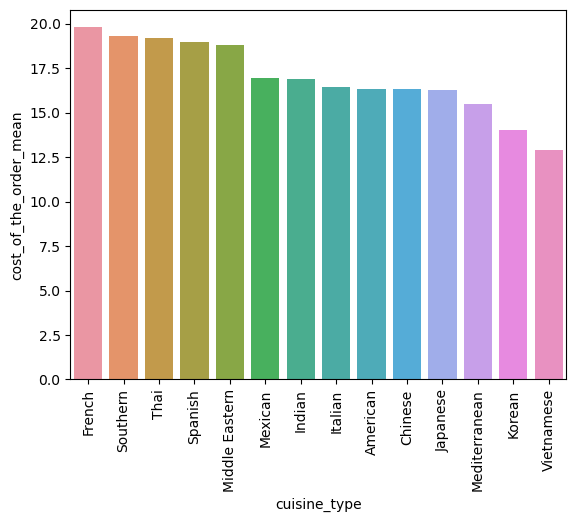

In [232]:
df_cost = group_df.sort_values(by='cost_of_the_order_mean',ascending=False) #need to sort so the weekend comes first like the above chart
bar_plot = sns.barplot(data=df_cost,x='cuisine_type',y='cost_of_the_order_mean');
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=90)
plt.show()

## <font color="Blue">No specific pattern for Cuisine and Rating</font>

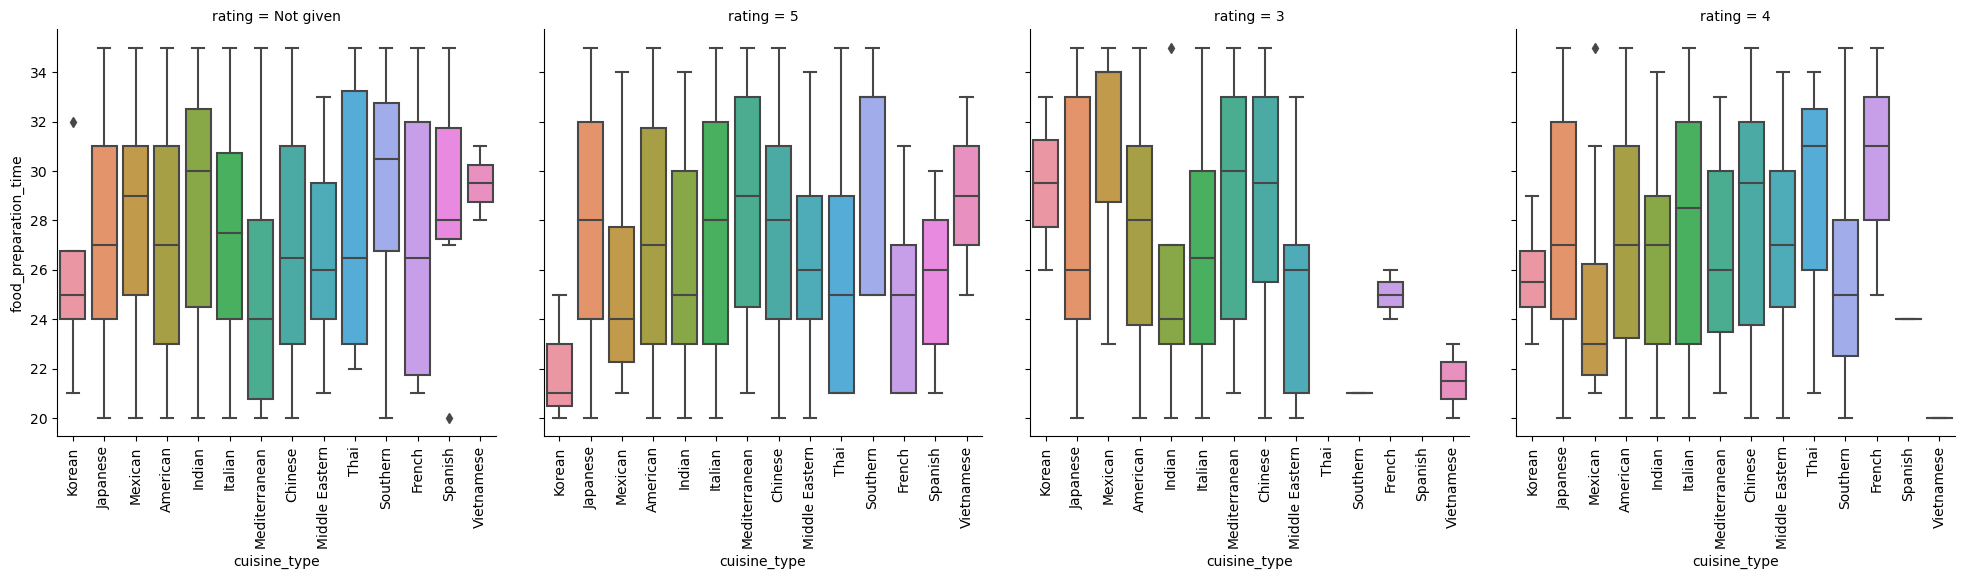

In [233]:
box_plot = sns.catplot(x='cuisine_type', y='food_preparation_time', data=df, kind='box',col='rating')
box_plot.set_xticklabels(rotation=90)
plt.show()

## <font color="Blue">Customer delivery time has many outliers ever for high ratings</font>

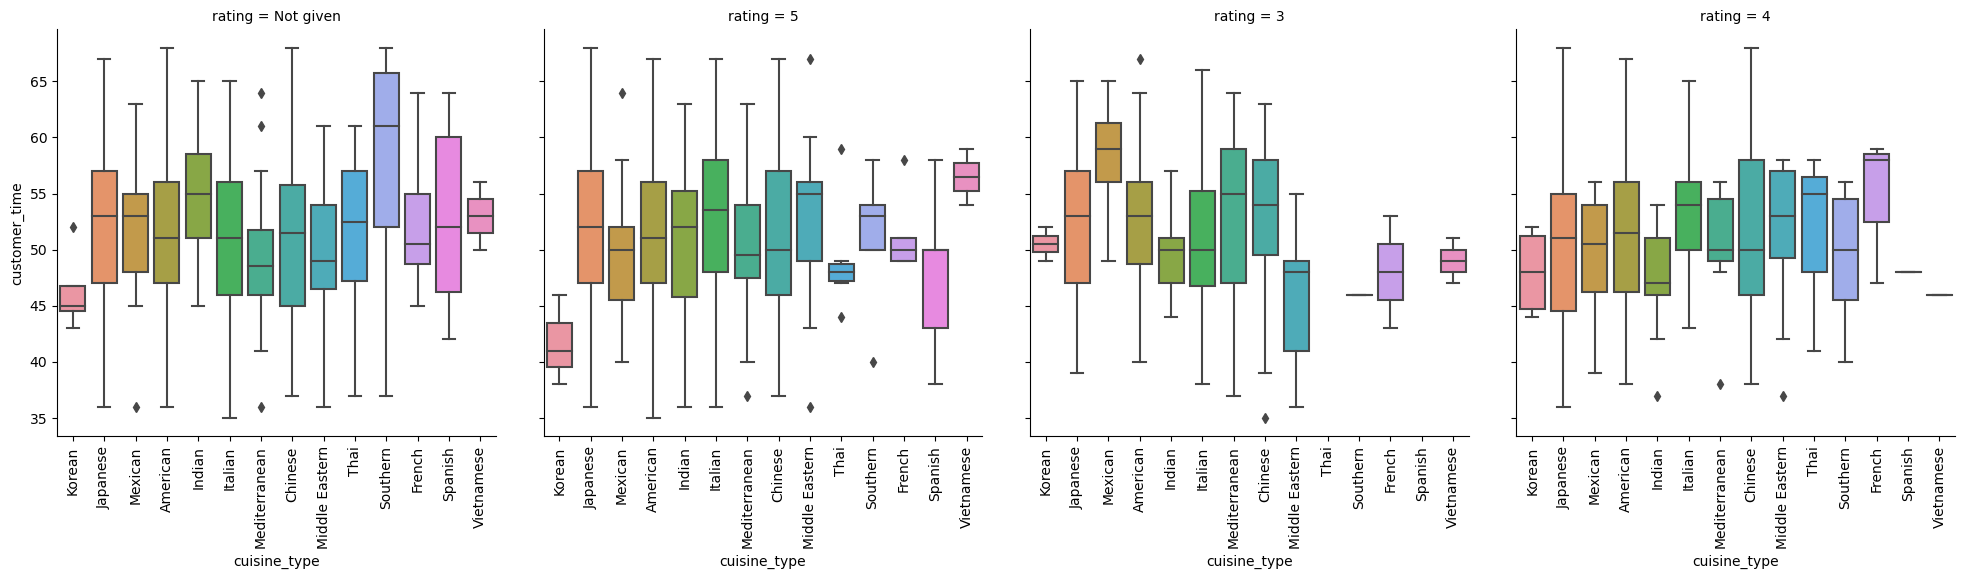

In [234]:
box_plot = sns.catplot(x='cuisine_type', y='customer_time', data=df, kind='box',col='rating')
box_plot.set_xticklabels(rotation=90)
plt.show()

## <font color="Blue">Cost of the order has many outliers ever for high ratings</font>

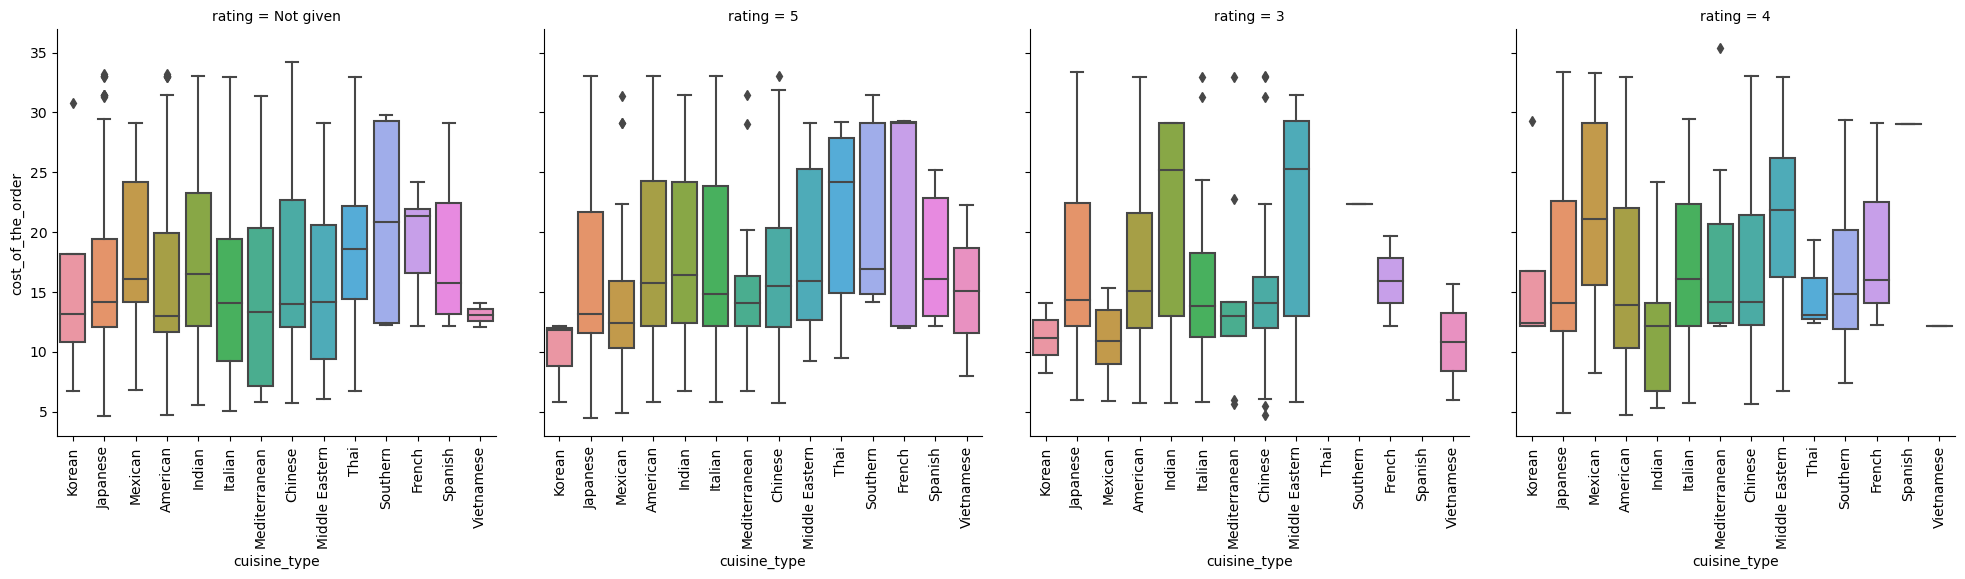

In [235]:
box_plot = sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind='box',col='rating')
box_plot.set_xticklabels(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [236]:
df_rated = df[df['rating'] != 'Not given'].copy() # error goes if done copy
df_rated['rating'] = df_rated['rating'].astype(int) # remove not given and covert rating to int

In [237]:
group_df = df_rated.groupby(['restaurant_name'])['rating'].agg(['mean','count']).reset_index() # calc group by mean and count of rating

In [238]:
result = group_df[(group_df['count'] > 50) & (group_df['mean'] > 4)]

## <font color="Blue">Restaurant with mean rating greater than 4 and over 50 ratings</font>

In [239]:
result

,restaurant_name,mean,count
16,Blue Ribbon Fried Chicken,4.328125,64
17,Blue Ribbon Sushi,4.219178,73
117,Shake Shack,4.278195,133
132,The Meatball Shop,4.511905,84


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [240]:
# Write the code here
def calc_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
    
df['revenue'] = df['cost_of_the_order'].apply(calc_revenue)

## <font color="Blue">Total revenue</font>

In [241]:
df['revenue'].sum()

6166.303

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

## <font color="Blue">Percentage of orders that take more than 60 minutes to be delivered</font>

In [242]:
# Write the code here
# customer_time is the total time from customer's pov we added prep and delivery earlier
result = round(df.loc[df['customer_time'] > 60]['order_id'].count()/df['order_id'].count(),2)*100
print(f"Percentage {result}%")

Percentage 11.0%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [243]:
# Write the code here
result = df.groupby(['day_of_the_week'])['delivery_time'].mean()
weekday_delivery_time = result['Weekday']
weekend_delivery_time = result['Weekend']


In [244]:
## <font color="Blue">Mean delivery time between weekday and weekend is 22 they are identical</font>

In [245]:
print(f"Mean delivery time over weekend is {round(weekend_delivery_time)} and over the weekday is {round(weekend_delivery_time)} in minutes")

Mean delivery time over weekend is 22 and over the weekday is 22 in minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Higher the cost of the order leads to higher the revenue not cuisine type or rating.
* Higher rating does not mean higher revenue
* Do what the customer does rather than what they rate, there are more orders irrespective of ratings or delivery time
* Average Higher cost of order does not lead to higher total revenue, meaning more expensive restaurants does not lead to increase revenue.
* Median Repeat customers rating is lower by 1 star, but average rating is about the same. Customer sat is going down this needs further investigation.

### Recommendations:

* Concentrate on total revenue by cuisine type and not on delivery time, ratings or cost of order
* Higher average cost per order does not lead to higher total revenue
* Weekends are more important then all weekdays combined, hire proper staff to support Weekends
